In [1]:
# import pytorch libraries
%matplotlib inline
import torch 
import torch.autograd as autograd 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

# Intro to Pytorch

PyTorch consists of 4 main packages:
* torch: a general purpose array library similar to Numpy that can do computations on GPU
* torch.autograd: a package for automatically obtaining gradients
* torch.nn: a neural net library with common layers and cost functions
* torch.optim: an optimization package with common optimization algorithms like SGD, Adam, etc

## Pytorch tensors
Like Numpy tensors but can utilize GPUs to accelerate its numerical computations. 

In [2]:
# creating tensors from lists or numpy arrays
x = torch.tensor([[1, 2],[3, 4]])
x.shape

torch.Size([2, 2])

In [3]:
# Create random tensor
N = 5
x = torch.randn(N, 10).type(torch.FloatTensor)

In [4]:
x

tensor([[ 5.5202e-01,  1.5325e+00,  2.3238e-01,  1.3697e-01, -1.8312e-01,
         -4.0452e-01,  3.1694e-01, -4.0636e-01, -1.2905e+00,  5.8617e-01],
        [-1.2913e-01, -9.8696e-02, -4.2240e-01, -7.2865e-01, -2.4308e-01,
          1.2958e+00, -6.1219e-01,  8.1288e-01, -1.5446e-01,  1.6568e+00],
        [-3.0231e-01,  1.3835e-01, -1.0783e+00,  1.3272e+00, -8.1760e-01,
         -1.8135e-01, -4.2698e-01, -3.0336e-01,  4.7895e-01,  5.2039e-01],
        [-2.3563e+00, -2.2943e+00, -4.0159e-01,  9.4906e-01,  1.4295e-02,
         -2.7297e+00, -1.3179e+00,  5.8888e-01, -1.2266e+00, -5.1505e-02],
        [ 2.8930e-01, -5.3817e-01,  2.0013e-01, -1.7574e-03, -1.3387e+00,
          6.4940e-01,  8.2567e-01, -6.8555e-01,  2.1885e+00, -1.1110e+00]])

In [5]:
# reshaping of tensors using .view()
x.view(1,-1) #-1 makes torch infer the second dim

tensor([[ 5.5202e-01,  1.5325e+00,  2.3238e-01,  1.3697e-01, -1.8312e-01,
         -4.0452e-01,  3.1694e-01, -4.0636e-01, -1.2905e+00,  5.8617e-01,
         -1.2913e-01, -9.8696e-02, -4.2240e-01, -7.2865e-01, -2.4308e-01,
          1.2958e+00, -6.1219e-01,  8.1288e-01, -1.5446e-01,  1.6568e+00,
         -3.0231e-01,  1.3835e-01, -1.0783e+00,  1.3272e+00, -8.1760e-01,
         -1.8135e-01, -4.2698e-01, -3.0336e-01,  4.7895e-01,  5.2039e-01,
         -2.3563e+00, -2.2943e+00, -4.0159e-01,  9.4906e-01,  1.4295e-02,
         -2.7297e+00, -1.3179e+00,  5.8888e-01, -1.2266e+00, -5.1505e-02,
          2.8930e-01, -5.3817e-01,  2.0013e-01, -1.7574e-03, -1.3387e+00,
          6.4940e-01,  8.2567e-01, -6.8555e-01,  2.1885e+00, -1.1110e+00]])

In [6]:
# from tensors to numpy arrays
x.numpy()

array([[ 5.5202258e-01,  1.5324641e+00,  2.3238428e-01,  1.3697372e-01,
        -1.8312012e-01, -4.0451506e-01,  3.1694263e-01, -4.0635753e-01,
        -1.2905294e+00,  5.8617008e-01],
       [-1.2913226e-01, -9.8695815e-02, -4.2239875e-01, -7.2865218e-01,
        -2.4308336e-01,  1.2957559e+00, -6.1218745e-01,  8.1288332e-01,
        -1.5445977e-01,  1.6567501e+00],
       [-3.0230689e-01,  1.3834929e-01, -1.0783136e+00,  1.3271898e+00,
        -8.1759948e-01, -1.8134765e-01, -4.2697915e-01, -3.0335742e-01,
         4.7895098e-01,  5.2039194e-01],
       [-2.3563495e+00, -2.2943420e+00, -4.0158853e-01,  9.4906092e-01,
         1.4295382e-02, -2.7297289e+00, -1.3179215e+00,  5.8887899e-01,
        -1.2265542e+00, -5.1504571e-02],
       [ 2.8930184e-01, -5.3816849e-01,  2.0013089e-01, -1.7574476e-03,
        -1.3387172e+00,  6.4939690e-01,  8.2567465e-01, -6.8555075e-01,
         2.1885130e+00, -1.1110328e+00]], dtype=float32)

## Pytorch Autograd
The autograd package in PyTorch provides classes and functions implementing automatic differentiation of arbitrary scalar valued function. For example, the gradient of the error with respect to all parameters.

`requires_grad=True` tells PyTorch that it needs to calculate the gradient with respect to this tensor.Here is an example:

In [7]:
x = torch.tensor([1., 2., 3., 4., 5., 6.], requires_grad=True)

In [8]:
# this is equivalent
x = torch.tensor([1., 2., 3., 4., 5., 6.]).requires_grad_()

In [9]:
x.grad

In [10]:
2*x**2 + 1

tensor([ 3.,  9., 19., 33., 51., 73.], grad_fn=<AddBackward0>)

In [11]:
L = (2*x**2 +1).sum()
L

tensor(188., grad_fn=<SumBackward0>)

In [12]:
L.backward() # computes the grad of L with respect to x

In [13]:
x.grad

tensor([ 4.,  8., 12., 16., 20., 24.])

In [26]:
# here is another example
x = torch.randn(2, 3)
x.requires_grad = True
x

tensor([[-1.6116, -0.0059,  0.6791],
        [ 1.0457, -2.6952,  0.2817]], requires_grad=True)

In [27]:
L = (x**2).sum()
L

tensor(11.4957, grad_fn=<SumBackward0>)

In [28]:
L.backward()
x.grad # note, it is the same shape as x

tensor([[-3.2233, -0.0118,  1.3581],
        [ 2.0914, -5.3905,  0.5633]])

## detach()
The detach() method constructs a new view on a tensor which is declared not to need gradients. This may be needed for example when you want to take the output to a model to numpy to compute a metric with sklean.

Run `x.numpy()` on x after the previous computation. See what happens. How would you fix this error?

## with torch.no_grad()
Prevent the gradients from being calculated in a piece of code. This is useful at validation time.

## torch.nn module
A neural net library with common layers and cost functions

`nn.Linear(5, 3)` creates a linear transformation with parameters $A$ and $b$ ($A\cdot X+b$). Given an input matrix of observvation $X$ ($N \times 5$), `nn.Linear(5, 3)` transforms X into a $N \times 3$ matrix, where $N$ can be anything (number of observations).

In [17]:
D = 5 # number of input featutes
M = 3 # neurons in the first hidden layer
linear_map = nn.Linear(D, M)

In [21]:
# parameters are initialized randomly
list(linear_map.parameters())

[Parameter containing:
 tensor([[-0.3280,  0.4061,  0.2603, -0.0183, -0.4411],
         [ 0.2967,  0.0547,  0.1132,  0.1029, -0.0365],
         [-0.0496, -0.0309,  0.4068, -0.2464, -0.4372]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0487,  0.2481, -0.4347], requires_grad=True)]

In [22]:
# shape of parameters
[p.shape for p in linear_map.parameters()]

[torch.Size([3, 5]), torch.Size([3])]

In [25]:
# total number of elements per parameter tensor. 
[p.numel() for p in linear_map.parameters()]

[15, 3]

**Exercise:** Create a layer with 20 input features  and 10 output features. Compute how many total parameters do you have. 

#  Linear Regression with Pytorch

The goal of linear regression is to fit a line to a set of points.

In [31]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)

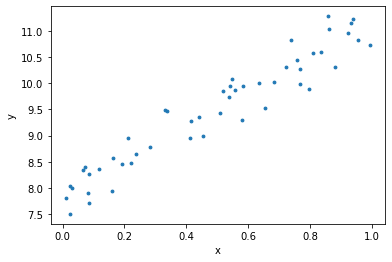

In [32]:
import matplotlib.pyplot as plt
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y"); 

You want to find **parameters** (weights) $a$ and $b$ such that you minimize the *error* between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error** ($\sum_i (\hat{y}_i - y_i)^2$). 

In [33]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

Suppose we believe $a = 10$ and $b = 5$ then we can compute `y_hat` which is our *prediction* and then compute our error.

In [34]:
y_hat = lin(10,5,x)
mse(y_hat, y)

4.530150475199336

In [35]:
def mse_loss(a, b, x, y): return mse(lin(a,b,x), y)

In [36]:
mse_loss(10, 5, x, y)

4.530150475199336

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for $a$ and $b$? How do we find the best *fitting* linear regression.

## Gradient Descent with Pytorch

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [37]:
# generate some more data
x, y = gen_fake_data(10000, 3., 8.)
x.shape, y.shape

((10000,), (10000,))

In [38]:
# Wrap x and y as tensor 
x = torch.tensor(x)
y = torch.tensor(y)

In [39]:
# Create random Tensors for weights, and wrap them in tensors.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these tensors during the backward pass.
a, b = np.random.randn(1), np.random.randn(1)
a = torch.tensor(a, requires_grad=True)
b = torch.tensor(b, requires_grad=True)
a,b

(tensor([-0.2641], dtype=torch.float64, requires_grad=True),
 tensor([1.3254], dtype=torch.float64, requires_grad=True))

In [40]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.item())
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()    

69.8644056414023
0.5311145624067163
0.09443281199220184
0.0911740379017952
0.09076106284568813
0.09045797784254733
0.0902260152974644
0.09004842299277167
0.08991245656822082
0.08980835932664152


In [42]:
# not that a and b should be close to 3 and 8 respectively
print(a,b)

tensor([3.0766], dtype=torch.float64, requires_grad=True) tensor([7.9584], dtype=torch.float64, requires_grad=True)


## Simplified GD Loop

In [43]:
# linear tranformation with input dimension=1 and output dimension=1
nn.Linear(1, 1)

Linear(in_features=1, out_features=1, bias=True)

### Models in Pytorch

In [44]:
# simple way of specifying a linear regression model
model = torch.nn.Sequential(
    nn.Linear(1, 1),
)
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [45]:
# equivalent way of specifiying the same model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(1, 1)
        
    def forward(self, x):
        x = self.lin(x)
        return x 
model =  LinearRegression()

In [46]:
# note here we have just two parameters, why?
print([p for p in model.parameters()])

[Parameter containing:
tensor([[0.8858]], requires_grad=True), Parameter containing:
tensor([0.8959], requires_grad=True)]


In [47]:
x, y = gen_fake_data(10000, 3., 8.)
x = torch.tensor(x).float()
y = torch.tensor(y).float()
x.shape

torch.Size([10000])

In [49]:
# you have to be careful with the dimensions that your model is expecting
# unsqueeze dim=1 transforms [10000] to [10000, 1]
x = torch.unsqueeze(x, 1)
x.shape

torch.Size([10000, 1])

In [50]:
y_hat = model(x)
print(y_hat)

tensor([[1.0192],
        [1.4533],
        [1.6491],
        ...,
        [1.6278],
        [1.2806],
        [1.1278]], grad_fn=<AddmmBackward>)


In [51]:
y_hat.shape

torch.Size([10000, 1])

In [52]:
y.shape

torch.Size([10000])

In [53]:
y = y.unsqueeze(1)
F.mse_loss(y_hat, y)

tensor(67.0558, grad_fn=<MseLossBackward>)

In [54]:
# validation data
x_val, y_val = gen_fake_data(1000, 3., 8.)
x_val = torch.tensor(x_val).float().unsqueeze(1)
y_val = torch.tensor(y_val).float().unsqueeze(1)

### Optimizer
Use the optim package to define an Optimizer that will update the weights of the model for us. Here we will use Adam

In [55]:
learning_rate = 0.1
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [56]:
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    model.train() # some layers have different behavior during train/and evaluation
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
       
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables
    optimizer.zero_grad()
    loss.backward() # computes gradients
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
    # checking validation loss
    model.eval()  # some layers have different behavior during train/and evaluation
    y_hat_val = model(x_val)
    val_loss = F.mse_loss(y_hat_val, y_val)
    
    if t % 1000 == 0: print("train loss %.3f valid loss %.3f" % (loss.item(), val_loss.item()))

train loss 67.056 valid loss 64.666
train loss 0.101 valid loss 0.102
train loss 0.093 valid loss 0.095
train loss 0.091 valid loss 0.094
train loss 0.090 valid loss 0.094
train loss 0.090 valid loss 0.094
train loss 0.090 valid loss 0.094
train loss 0.090 valid loss 0.094
train loss 0.090 valid loss 0.094
train loss 0.090 valid loss 0.094


In [57]:
print([p for p in model.parameters()])

[Parameter containing:
tensor([[3.0010]], requires_grad=True), Parameter containing:
tensor([7.9986], requires_grad=True)]


# Logistic Regression

In [120]:
# generating fake data
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_logistic_fake_data(n, a, b):
    x = np.random.uniform(-20,20, (n, 2))
    x2_hat = lin(a,b, x[:,0])
    y = x[:,1] > x2_hat
    return x, y.astype(int)

x, y = gen_logistic_fake_data(100, 1., 0.5)

In [121]:
y

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

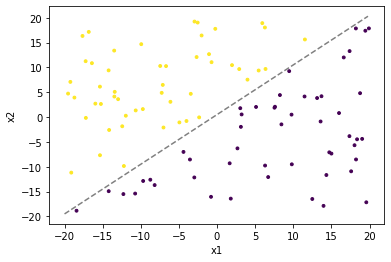

In [133]:
t = np.arange(-20, 20, 0.2)
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y, s=8)
plt.xlabel("x1"); plt.ylabel("x2");
plt.plot(t, t + 0.5, '--', c='gray')

In [72]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()

In [73]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [74]:
model(x).shape

torch.Size([100, 1])

In [75]:
# generating train and val data
x, y = gen_logistic_fake_data(10000, 1., 0.5)
x = torch.tensor(x).float()
y = torch.tensor(y).float().unsqueeze(1)

x_val, y_val = gen_logistic_fake_data(1000, 1., 0.5)
x_val = torch.tensor(x_val).float()
y_val = torch.tensor(y_val).float().unsqueeze(1)

In [76]:
learning_rate = 0.1
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [77]:
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    model.train()
    y_hat = model(x)
    loss = F.binary_cross_entropy(torch.sigmoid(y_hat), y)
       
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables
    optimizer.zero_grad()
    loss.backward()
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
    model.eval()
    y_hat_val = model(x_val)
    val_loss = F.binary_cross_entropy(torch.sigmoid(y_hat_val), y_val)
    
    if t % 1000 == 0: print("train loss %.3f valid loss %.3f" % (loss.item(), val_loss.item()))

train loss 1.245 valid loss 0.751
train loss 0.018 valid loss 0.017
train loss 0.014 valid loss 0.013
train loss 0.012 valid loss 0.011
train loss 0.010 valid loss 0.009
train loss 0.008 valid loss 0.008
train loss 0.007 valid loss 0.006
train loss 0.006 valid loss 0.005
train loss 0.005 valid loss 0.005
train loss 0.004 valid loss 0.004


In [78]:
print([p for p in model.parameters()])

[Parameter containing:
tensor([[-10.6495,  10.6255]], requires_grad=True), Parameter containing:
tensor([-5.4558], requires_grad=True)]


Exercise: Instead of using `F.binary_cross_entropy(torch.sigmoid(y_hat), y)` try `F.binary_cross_entropy_with_logits(y_hat, y)`. Look at the documentation for `F.binary_cross_entropy_with_logits`.

## How to take a vector back to numpy?

In [79]:
x, y = gen_logistic_fake_data(10, 1., 0.5)
x = torch.tensor(x).float()

In [80]:
x.numpy()

array([[ -8.552051 ,   5.042107 ],
       [-10.704544 ,   8.161397 ],
       [-15.575344 ,  -7.0837326],
       [  9.569121 ,  -1.9044411],
       [  6.4253044,   7.5156593],
       [ -4.6348243,  10.37898  ],
       [ 14.983649 , -17.890064 ],
       [-10.62132  , -18.129877 ],
       [-19.649536 ,  17.741898 ],
       [ -3.960147 ,  -4.0774217]], dtype=float32)

Exercise: Compute the accuracy of the validation logistic regression model

## Dataset and Data loaders 

Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

In [81]:
model2 = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
)

In [82]:
from torch.utils.data import Dataset, DataLoader

In [95]:
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x.astype(np.float32), y.astype(np.float32)

# create a dataset
class RegressionDataset(Dataset):
    def __init__(self, a=3, b=8, n=10000):
        x, y = gen_fake_data(n, a, b)
        x = torch.from_numpy(x).unsqueeze(1)
        y = torch.from_numpy(y)
        self.x, self.y = x, y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
fake_train_ds = RegressionDataset()
fake_valid_ds = RegressionDataset()

Next we are going to create a data loader. The data loader provides the following features:
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

In [104]:
train_dl = DataLoader(fake_train_ds, batch_size=1000, shuffle=True)
valid_dl = DataLoader(fake_valid_ds, batch_size=1000, shuffle=False)

In [105]:
# getting a batch of data
x, y = next(iter(train_dl))

In [106]:
x.shape, y.shape

(torch.Size([1000, 1]), torch.Size([1000]))

In [108]:
model2(x).shape

torch.Size([1000, 1])

In [99]:
from sklearn.metrics import r2_score

def val_metric(model, valid_dl):
    model.eval()
    losses = []
    y_hats = []
    ys = []
    for x, y in valid_dl:
        y = y.unsqueeze(1)
        y_hat = model(x.float())
        loss = F.mse_loss(y_hat, y.float())
        y_hats.append(y_hat.detach().numpy())
        ys.append(y.numpy())
        losses.append(loss.item())
    
    ys = np.concatenate(ys)
    y_hats = np.concatenate(y_hats)
    return np.mean(losses), r2_score(ys, y_hats)

In [100]:
valid_loss, valid_r2 = val_metric(model2, valid_dl)
valid_loss, valid_r2

(70.57502746582031, -83.13645542297598)

In [101]:
## train_loop function
def train_loop(model, train_dl, valid_dl, optimizer, epochs):
    model.train()
    losses = []
    for i in range(epochs):
        for x, y in train_dl:
            y = y.unsqueeze(1)
            y_hat = model(x.float())
            loss = F.mse_loss(y_hat, y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        
        train_loss = np.mean(losses)
        valid_loss, valid_auc = val_metric(model, valid_dl)
        print("train loss %.3f valid loss %.3f auc roc %.3f" % (train_loss, valid_loss, valid_auc))

In [116]:
model2 = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
)
learning_rate = 0.1
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [117]:
train_loop(model2, train_dl, valid_dl, optimizer, epochs=20)

train loss 85.088 valid loss 70.502 auc roc -83.049
train loss 72.447 valid loss 48.049 auc roc -56.282
train loss 61.584 valid loss 31.017 auc roc -35.977
train loss 52.472 valid loss 18.915 auc roc -21.550
train loss 44.974 valid loss 10.891 auc roc -11.984
train loss 38.888 valid loss 5.946 auc roc -6.088
train loss 33.983 valid loss 3.140 auc roc -2.743
train loss 30.036 valid loss 1.677 auc roc -1.000
train loss 26.846 valid loss 0.983 auc roc -0.172
train loss 24.245 valid loss 0.683 auc roc 0.186
train loss 22.097 valid loss 0.562 auc roc 0.330
train loss 20.300 valid loss 0.512 auc roc 0.390
train loss 18.777 valid loss 0.485 auc roc 0.422
train loss 17.470 valid loss 0.465 auc roc 0.446
train loss 16.336 valid loss 0.445 auc roc 0.469
train loss 15.342 valid loss 0.426 auc roc 0.492
train loss 14.464 valid loss 0.407 auc roc 0.515
train loss 13.682 valid loss 0.389 auc roc 0.537
train loss 12.982 valid loss 0.371 auc roc 0.558
train loss 12.351 valid loss 0.354 auc roc 0.579


In [118]:
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)
train_loop(model2, train_dl, valid_dl, optimizer, epochs=20)

train loss 0.335 valid loss 0.319 auc roc 0.620
train loss 0.318 valid loss 0.290 auc roc 0.654
train loss 0.304 valid loss 0.264 auc roc 0.685
train loss 0.291 valid loss 0.241 auc roc 0.712
train loss 0.278 valid loss 0.221 auc roc 0.737
train loss 0.267 valid loss 0.203 auc roc 0.758
train loss 0.256 valid loss 0.187 auc roc 0.777
train loss 0.246 valid loss 0.173 auc roc 0.794
train loss 0.237 valid loss 0.160 auc roc 0.809
train loss 0.228 valid loss 0.149 auc roc 0.822
train loss 0.220 valid loss 0.140 auc roc 0.833
train loss 0.213 valid loss 0.132 auc roc 0.842
train loss 0.206 valid loss 0.125 auc roc 0.851
train loss 0.200 valid loss 0.120 auc roc 0.858
train loss 0.194 valid loss 0.115 auc roc 0.863
train loss 0.189 valid loss 0.110 auc roc 0.868
train loss 0.184 valid loss 0.107 auc roc 0.872
train loss 0.180 valid loss 0.104 auc roc 0.876
train loss 0.175 valid loss 0.102 auc roc 0.879
train loss 0.171 valid loss 0.100 auc roc 0.881


**Exercise**: Play with the training of the previous model to get the max auc possible. Can you use larger learning rates or more epochs? 

# References
* https://pytorch.org/docs/stable/index.html
* http://pytorch.org/tutorials/beginner/pytorch_with_examples.html
* https://hsaghir.github.io/data_science/pytorch_starter/